In [1]:
%matplotlib inline
import svm
import kernel
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=20, num_features=2, grid_size=200):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    #trainer = svm.SVMTrainer(kernel.Kernel.linear())
    trainer = svm.SVMTrainer(kernel.Kernel.gaussian())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 0.0832681   0.19906879]
 [ 0.15970608  0.71236163]
 [-0.34306807 -0.83944147]
 [ 0.38274535 -0.04919   ]
 [-0.25475496  0.38090098]
 [-0.64223275 -0.01695532]
 [-0.28749797 -1.8730841 ]
 [ 0.29297423 -0.81138827]
 [ 0.81473859  0.91631174]
 [ 2.30239335  1.73444841]
 [ 0.39698559 -0.7525512 ]
 [ 0.41240175 -1.11793198]
 [ 0.46681923 -1.12899679]
 [ 0.23766717  1.80373096]
 [ 1.20477537  1.08873473]
 [ 0.33443212 -1.18582496]
 [-1.98561086  1.79219998]
 [-0.61738372  2.06419996]
 [ 0.64267775  2.04397846]
 [-0.29906417  0.16161942]]
     pcost       dcost       gap    pres   dres
 0: -5.4807e+00 -1.6106e+01  1e+01  1e-16  2e+00
 1: -7.7842e+00 -1.1536e+01  4e+00  4e-16  8e-01
 2: -1.9773e+01 -2.8200e+01  8e+00  4e-15  7e-01
 3: -2.5000e+01 -2.8006e+01  3e+00  5e-16  1e-01
 4: -2.5321e+01 -2.5481e+01  2e-01  4e-15  3e-03
 5: -2.5370e+01 -2.5375e+01  4e-03  7e-15  2e-05
 6: -2.5372e+01 -2.5372e+01  5e-05  1e-14  2e-07
 7: -2.5372e+01 -2.5372e+01  5e-07  7e-15  2e-09
Optimal solution fo

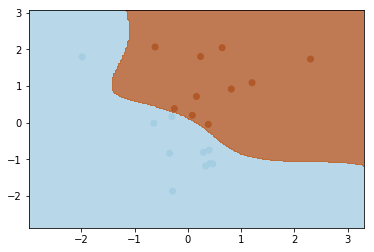

In [2]:
example()